In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df=pd.read_excel('TA2.xlsx')
df

,Manufacturer,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,...,"size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,...,0,0,0,0,0,0,0,0,430,16041
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,...,0,0,0,0,0,0,0,1,535,16364
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,...,0,0,0,0,1,0,0,0,495,15998
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,...,0,0,0,0,1,0,0,1,540,16214
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,...,0,0,0,0,0,1,0,0,545,16343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Toshiba,60,120,1080,3.12,3.12,3.30,3.53,3.13,3.73,...,0,0,0,1,1,0,0,1,1070,8853
700,Toshiba,60,240,720,2.53,3.12,3.19,3.40,2.53,3.14,...,0,0,0,1,0,1,0,0,1060,8100
701,Toshiba,60,240,1080,2.51,3.15,2.84,3.49,2.84,3.34,...,0,0,0,1,0,1,0,1,1150,8477
702,Toshiba,60,600,720,2.51,3.33,3.11,3.23,3.18,3.16,...,0,0,0,1,0,0,1,0,1155,8337


# Data exploration

In [3]:
df.describe()

,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,...,"size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,...,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,41.545455,255.000000,900.000000,3.691307,3.619588,3.703097,3.729943,3.563452,3.578864,3.795199,...,0.090909,0.090909,0.090909,0.090909,0.250000,0.250000,0.250000,0.500000,852.485795,17078.058239
std,11.996120,209.612526,180.127977,0.495193,0.489573,0.520872,0.439805,0.594670,0.448732,0.556405,...,0.287684,0.287684,0.287684,0.287684,0.433321,0.433321,0.433321,0.500355,216.296580,4985.053419
min,19.000000,60.000000,720.000000,1.700000,2.390000,2.170000,2.360000,2.170000,1.980000,2.590000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,8077.000000
25%,32.000000,105.000000,720.000000,3.330000,3.257500,3.317500,3.420000,3.110000,3.270000,3.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,685.000000,13633.750000
50%,42.000000,180.000000,900.000000,3.670000,3.520000,3.780000,3.760000,3.510000,3.560000,3.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,850.000000,16312.000000
75%,52.000000,330.000000,1080.000000,4.140000,3.980000,4.130000,4.052500,4.060000,3.890000,4.252500,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,1.000000,1020.000000,21035.500000
max,60.000000,600.000000,1080.000000,4.840000,4.910000,4.730000,5.000000,4.840000,5.000000,4.980000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1415.000000,28621.000000


In [4]:
df['Manufacturer'].unique()

array(['LG', 'Panasonic', 'Sony', 'Samsung', 'Philips', 'Vizio', 'Sharp',
       'Toshiba'], dtype=object)

In [5]:
df.columns

Index(['Manufacturer', 'Screen Size', 'Pixel', 'Motion Rate', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating', 'size=26"',
       'size=32"', 'size=36"', 'size=40"', 'size=42"', 'size=46"', 'size=49"',
       'size=52"', 'size=55"', 'size=60"', 'motionrate=120', 'motionrate=240',
       'motionrate=600', 'Pixel=1080', 'Selling Price',
       'Yearly units sold in US'],
      dtype='object')

In [6]:
df1=df[['Screen Size', 'Pixel', 'Motion Rate', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating','Selling Price',
       'Yearly units sold in US']]
corr=df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,Selling Price,Yearly units sold in US
Screen Size,1.000000,-0.000000,0.000000,-0.007038,-0.008318,-0.011203,0.065436,-0.001411,-0.001124,-0.001263,-0.039250,0.875676,-0.331604
Pixel,-0.000000,1.000000,0.000000,-0.012334,-0.016748,-0.018796,0.023284,0.004206,0.007477,0.000677,0.021151,0.235220,-0.010296
Motion Rate,0.000000,0.000000,1.000000,-0.001091,-0.019715,-0.009006,0.015643,0.007912,0.002027,-0.008380,0.024081,0.166596,0.013202
Overall Rating,-0.007038,-0.012334,-0.001091,1.000000,0.614477,0.501681,0.461970,0.174514,0.383200,0.579567,0.632880,0.255207,0.041399
Video Quality,-0.008318,-0.016748,-0.019715,0.614477,1.000000,0.377498,0.311314,0.350832,0.548590,0.736789,0.628357,0.225254,0.094028
Sound quality,-0.011203,-0.018796,-0.009006,0.501681,0.377498,1.000000,0.608126,0.329421,0.132603,0.137250,0.386100,0.184935,0.032606
Appearance,0.065436,0.023284,0.015643,0.461970,0.311314,0.608126,1.000000,0.287413,0.162274,0.197769,0.373247,0.254765,0.005866
Number of Features,-0.001411,0.004206,0.007912,0.174514,0.350832,0.329421,0.287413,1.000000,0.359991,0.222417,0.299412,0.108304,0.099540
Ease of Set up,-0.001124,0.007477,0.002027,0.383200,0.548590,0.132603,0.162274,0.359991,1.000000,0.544632,0.525836,0.174709,0.056903
Life Span,-0.001263,0.000677,-0.008380,0.579567,0.736789,0.137250,0.197769,0.222417,0.544632,1.000000,0.594893,0.211577,0.093225


Change it to a better view:

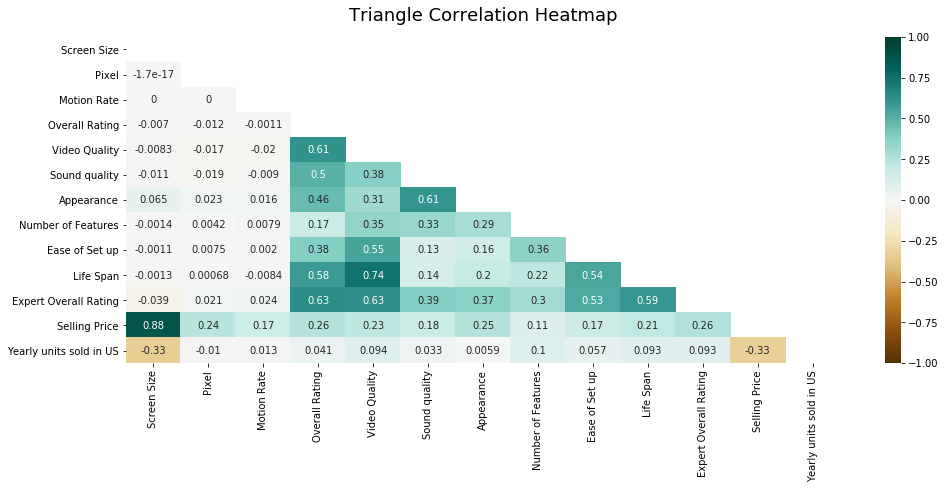

In [7]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Observations:

Selling price and screen size have strong correlation(>0.8), which would lead to multicolinarity issue.

Additionally, Video Quality Rating has moderate correlation with Life Span Rating.

Expert overall rating has moderate correlation with Overall Rating, Video Quality, and Life Span.

Appearance has moderate correlation with Sound Quality.

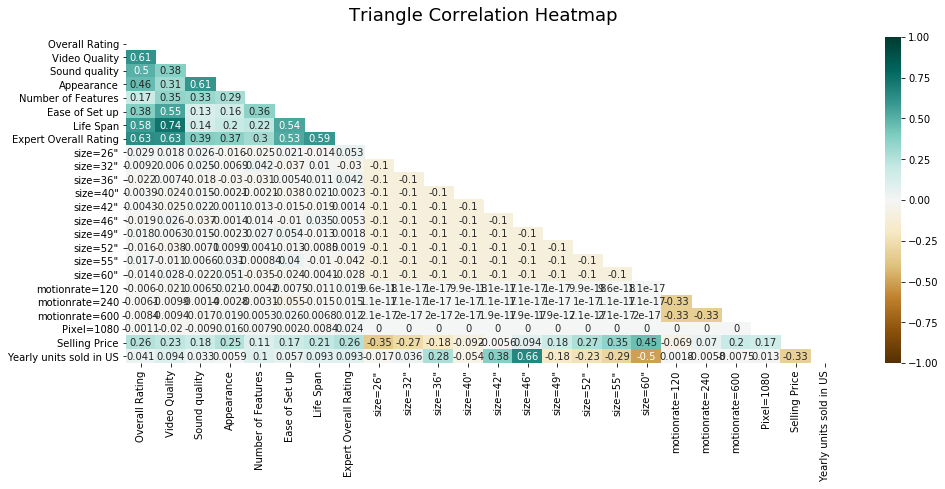

In [8]:
df2=df[['Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating', 'size=26"',
       'size=32"', 'size=36"', 'size=40"', 'size=42"', 'size=46"', 'size=49"',
       'size=52"', 'size=55"', 'size=60"', 'motionrate=120', 'motionrate=240',
       'motionrate=600', 'Pixel=1080', 'Selling Price',
       'Yearly units sold in US']]
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

After using dummy variables for screen size, there is no correlation>0.8, so mulcolinarity issue has been moderated. df2 is the dataset we will use for regression.

Yearly units sold in US has a relatively high correlation with TV size 46.

# Questions to consider:

1. Where does Panasonic stand in each feature (each user rating category) relative to competitors?
2. Which feature does customer value most?
3. Whether investing in the feature where users rate them lower than competitors is the best strategy?
4. If no for Q3, what is the recommendation?
5. What are the rankings for features in term of where they should considering investing first?

# Q1: How is Panasonic rated in comparison to its competitors on various features?

In [9]:
table = pd.pivot_table(df, values = ['Overall Rating','Video Quality', 'Sound quality', 'Appearance', 'Number of Features','Ease of Set up', 'Life Span', 'Expert Overall Rating'], 
                       index = ['Manufacturer'], aggfunc = np.mean, margins=True)
pd.options.display.float_format = "{:,.2f}".format
column_names = ['Overall Rating','Expert Overall Rating','Sound quality','Video Quality','Appearance','Number of Features','Ease of Set up','Life Span']
table = table.reindex(columns=column_names)
table = table.reindex(['Panasonic','LG', 'Sony', 'Samsung', 'Philips', 'Vizio', 'Sharp', 'Toshiba','All'])
table

,Overall Rating,Expert Overall Rating,Sound quality,Video Quality,Appearance,Number of Features,Ease of Set up,Life Span
Manufacturer,,,,,,,,
Panasonic,3.95,4.20,3.50,4.38,3.59,3.81,4.21,4.64
LG,3.47,3.70,4.21,3.42,3.97,4.23,3.60,3.10
Sony,4.32,4.51,4.08,3.91,3.96,3.24,3.73,4.10
Samsung,4.20,4.12,4.20,4.13,4.22,4.38,3.88,4.49
Philips,3.77,3.37,3.89,3.39,4.03,2.90,3.21,3.60
Vizio,3.23,3.24,2.99,3.10,3.13,3.15,3.40,3.54
Sharp,3.40,3.19,3.63,3.57,3.46,3.36,3.19,3.38
Toshiba,3.20,3.40,3.11,3.06,3.48,3.43,3.40,3.51
All,3.69,3.72,3.70,3.62,3.73,3.56,3.58,3.80


In [10]:
# Visualize the result:

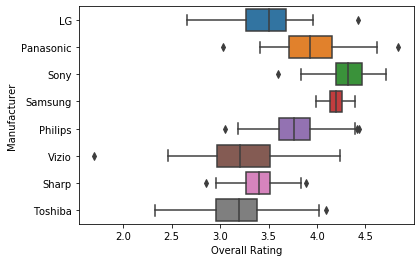

In [11]:
sns.boxplot(x ='Overall Rating', y ='Manufacturer', data = df)

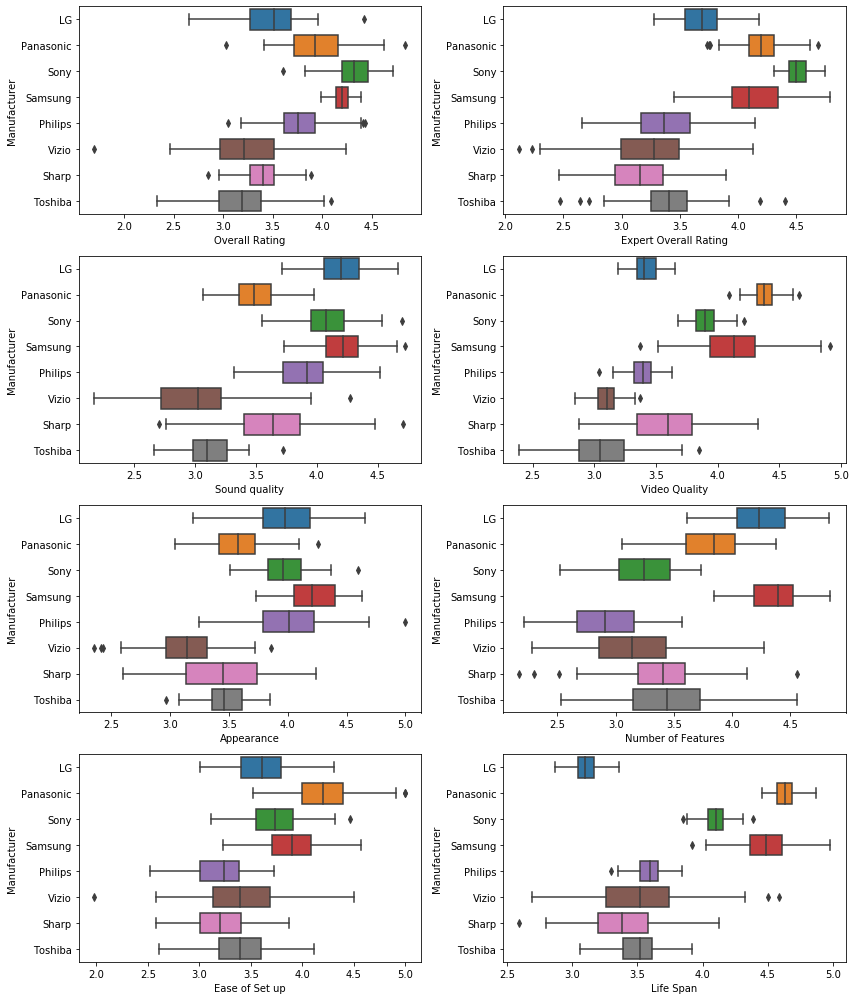

In [12]:
fig, axes = plt.subplots(4,2,figsize=(12, 14))
for name, ax in zip(column_names, axes.flatten()):
    sns.boxplot( x= name,y='Manufacturer', data=df, ax=ax)
plt.tight_layout()

Key observations:

1. Overall Rating: Panasonic is behind Sony and Samsung
    
    Expert Overall rating: Panasonic is behind Sony only
    

2. Video Quality: Panasonic is relatively on the leading position

    Ease of Set up: Panasonic is relatively on the leading position

    Life Span: Panasonic is relatively on the leading position
    

3. Number of Features: Panasonic is behind Samsung and Sony  *

    Apearance: Panasonic is behind Samsung, Philips, LG and Sony  **

    Sound Quality: Panasonic is far behind Samsung, LG, Sony and Philips  **

Below are some number calculations to support above observations:

In [13]:
panasonic=df.loc[df['Manufacturer']=='Panasonic',:]
panasonic_pt = pd.pivot_table(panasonic, values = ['Overall Rating','Expert Overall Rating','Sound quality','Video Quality','Appearance','Number of Features','Ease of Set up','Life Span'], 
                       index = ['Manufacturer'], aggfunc = np.mean)
pd.options.display.float_format = "{:,.2f}".format
column_names = ['Overall Rating','Expert Overall Rating','Sound quality','Video Quality','Appearance','Number of Features','Ease of Set up','Life Span']
panasonic_pt = panasonic_pt.reindex(columns=column_names)
panasonic_pt

,Overall Rating,Expert Overall Rating,Sound quality,Video Quality,Appearance,Number of Features,Ease of Set up,Life Span
Manufacturer,,,,,,,,
Panasonic,3.95,4.20,3.50,4.38,3.59,3.81,4.21,4.64


In [14]:
competitors=df.loc[df['Manufacturer']!='Panasonic',:]
competitors_pt=pd.pivot_table(competitors, values = ['Overall Rating','Video Quality', 'Sound quality', 'Appearance', 'Number of Features', 'Ease of Set up', 'Life Span', 'Expert Overall Rating'], 
                       index = ['Manufacturer'], aggfunc = np.mean, margins=True)
pd.options.display.float_format = "{:,.2f}".format
column_names = ['Overall Rating','Expert Overall Rating','Sound quality','Video Quality','Appearance','Number of Features','Ease of Set up','Life Span']
competitors_pt = competitors_pt.reindex(columns=column_names)
competitors_pt

,Overall Rating,Expert Overall Rating,Sound quality,Video Quality,Appearance,Number of Features,Ease of Set up,Life Span
Manufacturer,,,,,,,,
LG,3.47,3.70,4.21,3.42,3.97,4.23,3.60,3.10
Philips,3.77,3.37,3.89,3.39,4.03,2.90,3.21,3.60
Samsung,4.20,4.12,4.20,4.13,4.22,4.38,3.88,4.49
Sharp,3.40,3.19,3.63,3.57,3.46,3.36,3.19,3.38
Sony,4.32,4.51,4.08,3.91,3.96,3.24,3.73,4.10
Toshiba,3.20,3.40,3.11,3.06,3.48,3.43,3.40,3.51
Vizio,3.23,3.24,2.99,3.10,3.13,3.15,3.40,3.54
All,3.65,3.65,3.73,3.51,3.75,3.53,3.49,3.67


Another way to visualize the result: using average Panasonic's score to see its percentile among all merchants for each feature

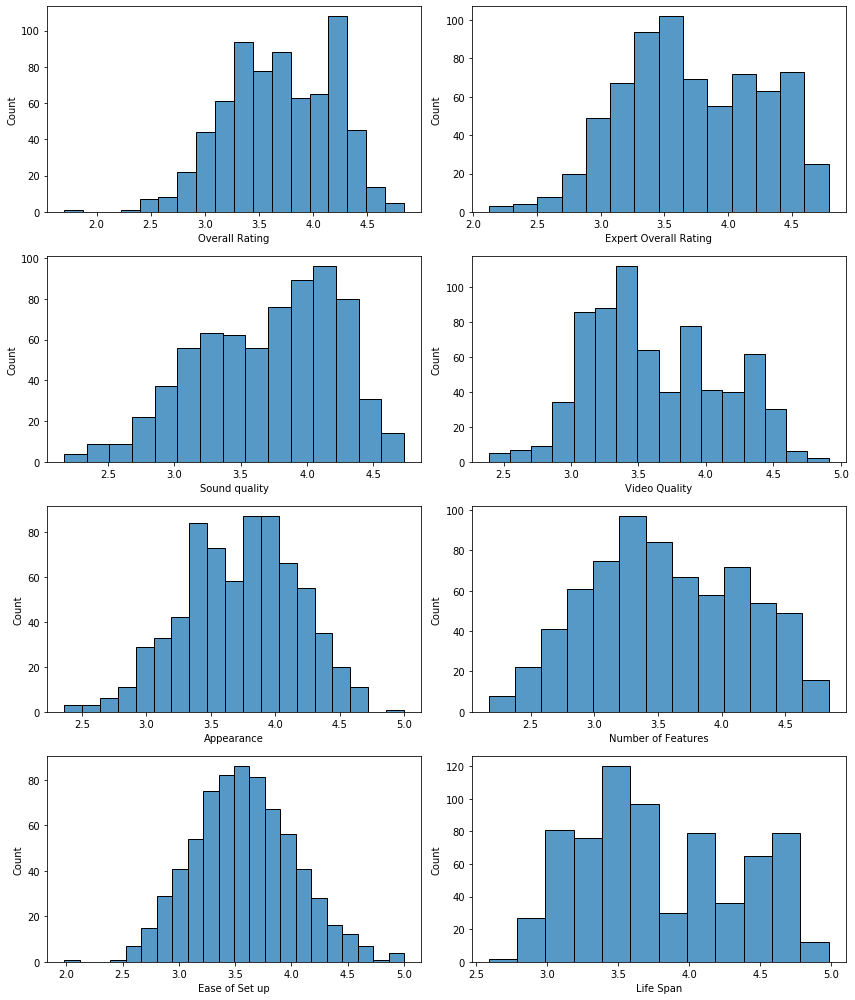

In [15]:
import seaborn as sns
fig, axes = plt.subplots(4,2,figsize=(12, 14))
for name, ax in zip(column_names, axes.flatten()):
    sns.histplot( x= name, data=df, ax=ax)
plt.tight_layout()

In [16]:
df3=df[['Overall Rating','Expert Overall Rating','Sound quality','Video Quality','Appearance','Number of Features','Ease of Set up','Life Span']]
dict = {}
for i in range(0,8):
    my_score = stats.percentileofscore(df3.iloc[:,i], table.iloc[0,i])  #use average Panasonic's score to see its percentile among all merchants
    dict[column_names[i]]=round(my_score, 2)
dict

{'Overall Rating': 65.34,
 'Expert Overall Rating': 76.28,
 'Sound quality': 35.37,
 'Video Quality': 91.05,
 'Appearance': 37.36,
 'Number of Features': 64.63,
 'Ease of Set up': 92.19,
 'Life Span': 91.19}

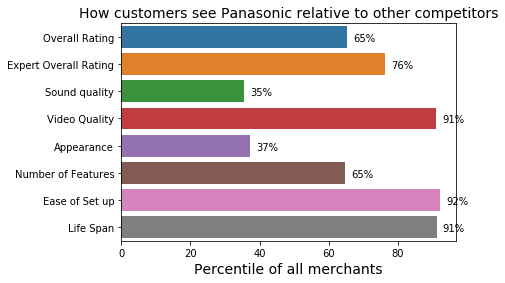

In [17]:
plots=sns.barplot(y=list(dict.keys()), x=list(dict.values()),orient='h')
for p in plots.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{0:.0%}'.format(width/100),        # or '{:1.2f}'.format(width)
             ha='center', va='center')
plt.xlabel("Percentile of all merchants", size=14)
plt.title("How customers see Panasonic relative to other competitors", size=14)
plt.show()

The above graph resonates with previous findings that Panasonic performs well in video quality, ease of setup and life span aspects compared to its competitors. However, it does not perform well in Sound quality and Appearance. In terms of numbers of features provided, it is doing okay.

# Q2: Which feature does customer value most?

In [18]:
df2 # use this dataset for regression, in which quantity sold can be related to product specifications, feature ratings, and selling price.

,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,"size=26""","size=32""",...,"size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US
0,3.71,3.34,4.12,3.61,4.33,3.38,2.99,3.63,0,0,...,0,0,0,0,0,0,0,0,430,16041
1,3.66,3.30,4.07,4.12,4.55,4.08,3.04,3.42,0,0,...,0,0,0,0,0,0,0,1,535,16364
2,3.72,3.38,4.37,4.07,4.11,3.40,3.13,3.77,0,0,...,0,0,0,0,1,0,0,0,495,15998
3,3.71,3.37,4.16,4.25,4.14,3.37,3.29,3.56,0,0,...,0,0,0,0,1,0,0,1,540,16214
4,3.62,3.54,4.57,4.10,4.23,3.76,3.13,4.06,0,0,...,0,0,0,0,0,1,0,0,545,16343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,3.12,3.12,3.30,3.53,3.13,3.73,3.57,3.12,0,0,...,0,0,0,1,1,0,0,1,1070,8853
700,2.53,3.12,3.19,3.40,2.53,3.14,3.31,3.61,0,0,...,0,0,0,1,0,1,0,0,1060,8100
701,2.51,3.15,2.84,3.49,2.84,3.34,3.72,3.39,0,0,...,0,0,0,1,0,1,0,1,1150,8477
702,2.51,3.33,3.11,3.23,3.18,3.16,3.44,3.50,0,0,...,0,0,0,1,0,0,1,0,1155,8337


In [19]:
y = df['Yearly units sold in US']
x = df2.drop(['Yearly units sold in US'], 1)
model = LinearRegression().fit(x, y)
var = x.columns.tolist()    
coef = model.coef_.tolist() 

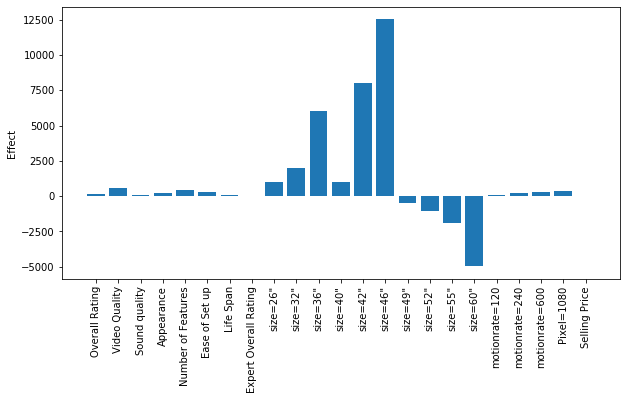

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(var, coef)
plt.ylabel('Effect')
plt.xticks(rotation='vertical')
plt.show()

In [21]:
var.insert(0, 'Intercept')
coef.insert(0, model.intercept_)
out = pd.DataFrame({'Variable': var, 'Coefficient': coef})
print(out)
out.to_csv("price_result.csv")

                 Variable  Coefficient
0               Intercept    10,480.03
1          Overall Rating       129.87
2           Video Quality       590.43
3           Sound quality        59.24
4              Appearance       212.56
5      Number of Features       435.99
6          Ease of Set up       312.66
7               Life Span       116.53
8   Expert Overall Rating        28.48
9                size=26"     1,007.48
10               size=32"     2,002.10
11               size=36"     6,016.60
12               size=40"     1,012.32
13               size=42"     8,016.86
14               size=46"    12,524.33
15               size=49"      -480.45
16               size=52"    -1,029.15
17               size=55"    -1,892.55
18               size=60"    -4,978.42
19         motionrate=120       100.65
20         motionrate=240       203.67
21         motionrate=600       303.87
22             Pixel=1080       355.96
23          Selling Price        -3.05


Intepretation:

1. TV with size 46" potentially will be sold 12,524 more than TV with size 19"; everything else remains equal.
2. TV with size 60" potentially will be sold 4978 less than TV with size 19"; everything else remains equal..

3. If the rating of video quality increases by 1 point and everything else remains equal, then TV's quantity sold in the US may increase by 590. 
4. If selling price increases by 1 dollar, then TV's quantity sold will drop by 3.


So quantity sold in the US is most sensitive about TV's size. TV with size 46" seems to be the most popular one.

Apart from product's specification, among 6 rating features, customers care about Video Quality most, then the number of features, ease of setup, and appearance respectively. 

In [22]:
#To visualize the result:

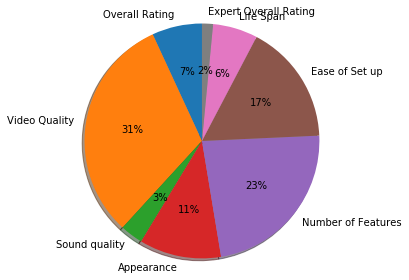

In [23]:
data=out.iloc[1:9,0:2]

fig1, ax1 = plt.subplots()
ax1.pie(data['Coefficient'],labels=data['Variable'], autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.tight_layout()
plt.show()

#data.plot.pie(y=data['Coefficient'],autopct="%.1f%%")

# Q3. Whether investing in the feature where users rate them lower than competitors is the best strategy?

Users rated Panasonic lower than its competitors particularily in Sound quality and Appearance.
In the aspects of number of features, overall rating and expert overall rating, it is little behind Sony and Samsung.

However, considering factors affecting customers purchanse (quantity sold), apart from TV's size, these factors have impact in order: video quality, numbers of features, ease of setup, appearance, life span and sound quality.

Therefore, merely investing in the feature where users rated Panasonic lower than its competitors, such as in sound quality and appearance, is not the best strategy.

# Q4. If no for Q3, what is the recommendation?

Our recommendation is to produce more TV with size 46, 42, 36 (with/or Pixel 1080 and motion rate 600). Because these are the most popular TV specifications and are likely to help increase sales.

# Q5. What are the rankings for features in term of where they should considering investing first?

For ranking features to invest, Panasonic may want to improve numbers of features fist. Because although customer values video quality most among 6 features, Panasonic has been in the leading position in video quality.
There is still some space for it to improve in numbers of features as it is averagely ranking 65% among all merchants. If they can increase their rating by 1 point (from 3.81 to 4.81), the quantity sold will increase by 435.

Next, they may want to invest on improving Appearance. If they can improve appearance rating by 0.6 to 4.19 (from 3.59) on average, quantity sold can be improved by 127.

And finally, they can think about improving sound quality. If they can improve appearance rating by 0.7 to 4.20 (from 3.50) on average, quantity sold can be improved by 41.




# Optional - Take a look at price difference

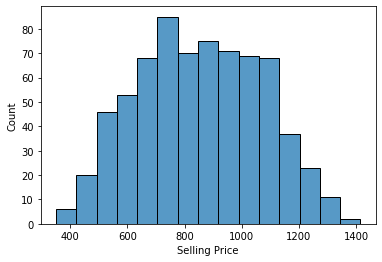

In [24]:
sns.histplot(x= df['Selling Price'], data=df)

In [25]:
avg_price = pd.pivot_table(df, values = ['Selling Price'],index = ['Screen Size', 'Pixel', 'Motion Rate'], aggfunc = np.mean)

In [26]:
avg_price
#slice pivot table avg_price.loc[(19,slice(None),720), :]

Selling Price
Screen Size Pixel Motion Rate               
19          60    720                 438.75
                  1080                528.75
            120   720                 490.62
                  1080                546.88
            240   720                 553.75
...                                      ...
60          120   1080              1,152.50
            240   720               1,136.88
                  1080              1,215.62
            600   720               1,209.38
                  1080              1,263.75

[88 rows x 1 columns]

In [27]:
ref=pd.DataFrame(avg_price.to_records())

In [28]:
ref.rename(columns = {'Selling Price':'Avg Selling Price'}, inplace = True)
ref=ref.astype({'Screen Size': int, 'Pixel': int, 'Motion Rate': int})
new_df=pd.merge(df, ref, how="left", on=['Screen Size','Pixel','Motion Rate'])

In [29]:
new_df['Price diff']=new_df['Selling Price']-new_df['Avg Selling Price']
new_df

,Manufacturer,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,...,"size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US,Avg Selling Price,Price diff
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,...,0,0,0,0,0,0,430,16041,438.75,-8.75
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,...,0,0,0,0,0,1,535,16364,528.75,6.25
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,...,0,0,1,0,0,0,495,15998,490.62,4.38
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,...,0,0,1,0,0,1,540,16214,546.88,-6.88
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,...,0,0,0,1,0,0,545,16343,553.75,-8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Toshiba,60,120,1080,3.12,3.12,3.30,3.53,3.13,3.73,...,0,1,1,0,0,1,1070,8853,"1,152.50",-82.50
700,Toshiba,60,240,720,2.53,3.12,3.19,3.40,2.53,3.14,...,0,1,0,1,0,0,1060,8100,"1,136.88",-76.88
701,Toshiba,60,240,1080,2.51,3.15,2.84,3.49,2.84,3.34,...,0,1,0,1,0,1,1150,8477,"1,215.62",-65.62
702,Toshiba,60,600,720,2.51,3.33,3.11,3.23,3.18,3.16,...,0,1,0,0,1,0,1155,8337,"1,209.38",-54.38


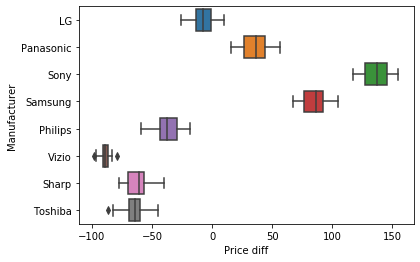

In [30]:
sns.boxplot(x ='Price diff', y ='Manufacturer', data = new_df)

Findings:

Panasonic's selling price is a little above average selling price. Compared to it, Samsung and Sony's prices are even higher. This makes sense considering that Sony and Samsung's overall rating, expert overall rating, and especially numbers of features are higher than Panasonic, and even brand awareness. 

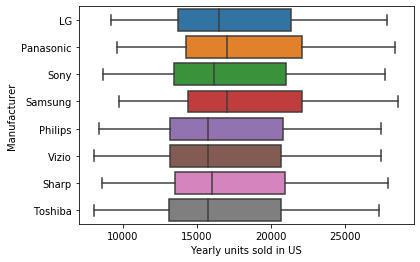

In [31]:
sns.boxplot(x ='Yearly units sold in US', y ='Manufacturer', data = new_df)

Findings:

While looking at quantity sold in the US among all manufacturers, Panasonic and Samsung nearly sell the most quantities. 


# Summary:

Without changing price, based on previous suggestions to improve quality (such as numbers of features, appearance), Panasonic can increase quantity sold in the US so as to improve total sales. 

They can also try to sell more popular size TVs (such as 46). Because at this size, the balance between size, cost, selling price and quantity sold achieves the best. 